## What it does:

This packages receives a data frame and function that could have multiplicative terms and runs setpwise selection from this package.

https://github.com/talhahascelik/python_stepwiseSelection

## Install package

In [ ]:
%%capture
!pip3 install git+git://github.com/gabriela-plantie/stepwise_formula

In [3]:
from stepwise_formula.stepwise import stepwise

In [4]:
import pandas as pd
import numpy as np
import scipy as sc
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

## create table with simulated data

In [8]:
x1=np.random.normal(0,1,1000)
x2=np.random.normal(0,1,1000)
x3=np.random.normal(0,1,1000)
x4=np.random.normal(0,1,1000)/5

z=1 + 2*x1 + x2 + 2*x2*x3 + x4
pr=1/(1+np.exp(-z))
y=sc.stats.binom.rvs(1, pr, size=1000)
df = pd.DataFrame(data={'y':y, 'x1':x1, 'x2':x2, 'x3':x3, 'x4':x4})


## Define formula

In [14]:
formula = 'y ~  x2*x3 + x1:x4 '

## Run stepwise using formula

In [15]:
a = stepwise(formula, df, 'logistic')

{x2*x3, x1*x4, 'x3', 'x2'}
Character Variables (Dummies Generated, First Dummies Dropped): []
Optimization terminated successfully.
         Current function value: 0.394587
         Iterations 7
Eliminated : x3
Optimization terminated successfully.
         Current function value: 0.394595
         Iterations 7
Eliminated : x1*x4
Optimization terminated successfully.
         Current function value: 0.396311
         Iterations 7
Regained :  x1*x4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      994
Method:                           MLE   Df Model:                            5
Date:                Wed, 07 Oct 2020   Pseudo R-squ.:                  0.4026
Time:                        13:48:16   Log-Likelihood:                -394.60
converged:                       True   LL-Null:                       -6

## filter final list of variables by pvalue

In [16]:
np.round(a[2].params[a[2].pvalues<0.01],2)

intercept    0.93
x1           1.82
x2           0.80
x2*x3        1.93
dtype: float64

## generate model with resulting varibles

In [17]:
formula = 'y ~ x1 + x2 + x2:x3'
model = smf.glm(formula = formula, data=df, family=sm.families.Binomial())
mod = model.fit()

In [18]:
np.round(mod.params[mod.pvalues<0.01],2)

Intercept    0.92
x1           1.80
x2           0.78
x2:x3        1.89
dtype: float64

In [19]:
pred=mod.predict(df)

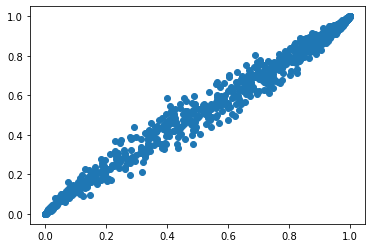

In [20]:
plt.scatter(pr, pred)

In [ ]:
#jupyter nbconvert README.ipynb --to markdown